# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random

# Fix the Path

In [2]:
os.chdir('D:')
os.getcwd()

'D:\\'

# Read the dataset

In [5]:
dataset = pd.read_csv('ads_dataset.csv')

# Thompson Sampling

In [6]:
N = 10000
d = 10
ads_selected = []
total_reward = 0
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d   
ad=0

In [7]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

# Plot

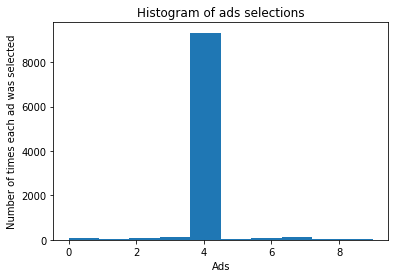

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [9]:
print('Total reward using Thompson Sampling:',total_reward)

Total reward using Thompson Sampling: 2606
